In [1]:
import sidmhalo
from sidmhalo.classes import load_profile
import os
import glob
import matplotlib.pyplot as plt

import numpy as np
import h5py
from scipy import interpolate

import simulations as sim

# Test save/load basic function

In [2]:
rm = 30 # radius of isothermal core, kpc
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q_sph = 1 # spherical axis ratio, dimensionless
Phi_b = None # baryon potential, Msun/kpc^2

profile = sidmhalo.gen.squashed(rm, M200, c, q0=q_sph, Phi_b=Phi_b)

relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/sidmhalo/spherical.py) took 2.008 seconds.


In [3]:
filename = 'data/test_profile_dill.npz'

profile.save(filename)

In [4]:
# loading the profile
lprofile = load_profile(filename)

In [5]:
lprofile.rho_sph_avg(100)

36731.994478133776

In [13]:
lprofile.q(2)

np.float64(0.9999999999999999)

# Testing rotation curve

In [ ]:
r = np.linspace(1, 30 , 20)
rotation_curve = profile.V(r)
# rotation_curve_4 = profile.Vsq_LM(r, 4)

# print(rotation_curve_4)

/home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/sidmhalo/classes.py:361: RuntimeWarning: invalid value encountered in log
  inner_slope = np.log(rho_LM_list[1] / rho_LM_list[0]) / np.log(
/home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/scipy/integrate/_ivp/common.py:132: RuntimeWarning: divide by zero encountered in scalar divide
  h1 = (0.01 / max(d1, d2)) ** (1 / (order + 1))


[Vsq_LM] r_eval: [ 1.          2.52631579  4.05263158  5.57894737  7.10526316  8.63157895
 10.15789474 11.68421053 13.21052632 14.73684211 16.26315789 17.78947368
 19.31578947 20.84210526 22.36842105 23.89473684 25.42105263 26.94736842
 28.47368421 30.        ]
[Vsq_LM] rmin: 0 rmax: 30.0
[Vsq_LM] L: 4
[Vsq_LM] rho_LM(r_eval[:3]): [array(12972548.85373848), array(13306789.72893339), array(5420840.79157161)]
[Vsq_LM] solution.t: []


AttributeError: 'list' object has no attribute 'shape'

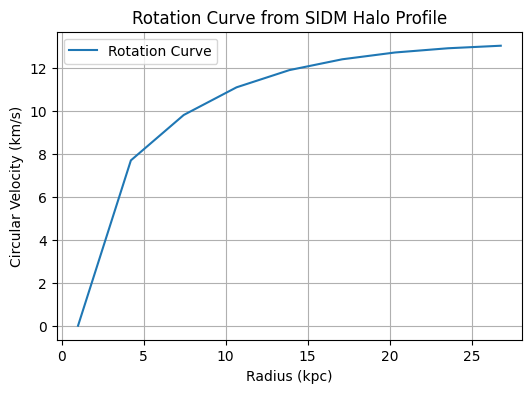

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(r, np.sqrt(test), label='Rotation Curve')
plt.xlabel('Radius (kpc)')
plt.ylabel('Circular Velocity (km/s)')
plt.title('Rotation Curve from SIDM Halo Profile')
plt.legend()
plt.grid()
plt.show()

In [8]:
r = np.linspace(1, 30, 50) # kpc
rotation_curve_0 = profile.Vsq_LM(r, 0) 
rotation_curve_2 = profile.Vsq_LM(r, 0) + profile.Vsq_LM(r, 2)

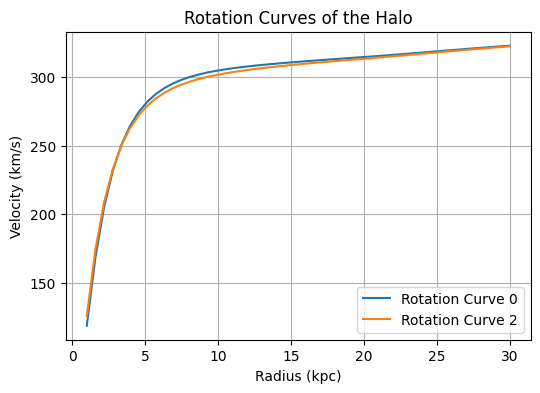

In [9]:
plt.figure(figsize=(6, 4))
plt.plot(r, rotation_curve_0**(0.5), label='Rotation Curve 0')
plt.plot(r, rotation_curve_2**(0.5), label='Rotation Curve 2')
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('Rotation Curves of the Halo')
plt.legend()
plt.grid()
plt.show()

In [10]:
check = profile.Vsq_LM(r, 1) # should be 0 
print(check)

/home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/sidmhalo/classes.py:397: RuntimeWarning: invalid value encountered in log
  outer_slope = np.log(rho_LM_list[-1] / rho_LM_list[-2]) / np.log(


[ 7.57034306e-09 -7.77866444e-09  1.03186032e-07  7.54507586e-08
  1.72430704e-09 -7.94069420e-08 -1.19745397e-07 -1.00050351e-07
 -5.86378957e-08 -1.79524360e-08  2.16275978e-08  5.83544478e-08
  8.27620320e-08  8.63085604e-08  7.94441617e-08  6.94379851e-08
  5.94394750e-08  5.06916016e-08  4.39531574e-08  3.85890660e-08
  3.41233352e-08  3.02292342e-08  2.66605818e-08  2.32036253e-08
  1.97876865e-08  1.68427562e-08  1.45122903e-08  1.30036348e-08
  1.26045492e-08  1.35938779e-08  1.61373360e-08  2.01707953e-08
  2.53583793e-08  3.11338231e-08  3.61896334e-08  3.93164598e-08
  4.10410615e-08  4.18638295e-08  4.21487589e-08  4.21295601e-08
  4.19395707e-08  4.16476938e-08  4.12768353e-08  4.08123547e-08
  4.01989849e-08  3.93176264e-08  3.79250415e-08  3.55200403e-08
  3.13581649e-08  2.35528901e-08]


# Test save/load with baryons 

In [14]:
from sidmhalo.definitions import GN

In [24]:
rm = 10 # radius of isothermal core, kpc
M200 = 1e12 # virial mass, Msun
c = 10 # concentration, dimensionless
q_sph = 1 # spherical axis ratio, dimensionless

def Phi_b(r, th):
    Md = 6.4e10
    a = 3.5
    b = 0.53
    return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)

ac_input = {'AC_prescription':'Cautun'}

profile = sidmhalo.gen.squashed(rm, M200, c, q0=q_sph, Phi_b=Phi_b, **ac_input)

if profile:
    print("Profile generated successfully")

relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/sidmhalo/spherical.py) took 2.671 seconds.
Profile generated successfully


In [25]:
filename = "test_profile_w_baryons_dill.npz"
profile.save(filename) 

In [26]:
lprofile = load_profile(filename)

In [27]:
print(f'Before save Phi_b(1,0): {profile.outer.Phi_b(1,0)}, and after the save Phi_b(1,0): {lprofile.outer.Phi_b(1,0)}') 
print(f'Before save Phi_b(1): {profile.inner.Phi_b(1)}, and after the save Phi_b(1,0): {lprofile.inner.Phi_b(1)}') 
print(f'Before save q(1): {profile.q(1)}, and after the save q(1): {lprofile.q(1)}') 

Before save Phi_b(1,0): -59443.38503988109, and after the save Phi_b(1,0): -59443.38503988109
Before save Phi_b(1): -63497.85674532449, and after the save Phi_b(1,0): -63497.85674532449
Before save q(1): 0.4796133098021423, and after the save q(1): 0.4796133098021423


In [29]:
print(profile.outer.AC_prescription)

Cautun


# Writing simulation reader

In [3]:
data_path = os.getcwd() + '/data/EAGLE-50-data/'

# os.listdir(data_path)

In [9]:
# load the hdf5 file 
file_list = glob.glob(data_path + 'SIDM1b*')
filename = file_list[1]
print(filename)

/home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/examples/data/EAGLE-50-data/SIDM1b_cylindrical_density_and_potential.hdf5


In [11]:
# check the structure of the file 
with h5py.File(filename, 'r') as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

    # get GrNm = 1
    

Keys: <KeysViewHDF5 ['GrNm', 'L', 'M200', 'Redges', 'Zedges', 'baryon_potential_sphere', 'bh_potential_sphere', 'bh_rho', 'dm_potential_sphere', 'dm_rho', 'gas_potential_sphere', 'gas_rho', 'pos', 'r200', 'smooth_dm_rho', 'star_potential_sphere', 'star_rho', 'total_potential_sphere']>


In [14]:
data = {}
with h5py.File(filename, 'r') as f:
    for key in f.keys():
        data[key] = f[key][0]
        
data['Redges']*1e3

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [ ]:
      rho_2D_int = RectBivariateSpline(
            R_cent, z_cent, rho_2D, bbox=extent, kx=3, ky=3
        )
        return rho_2D_int

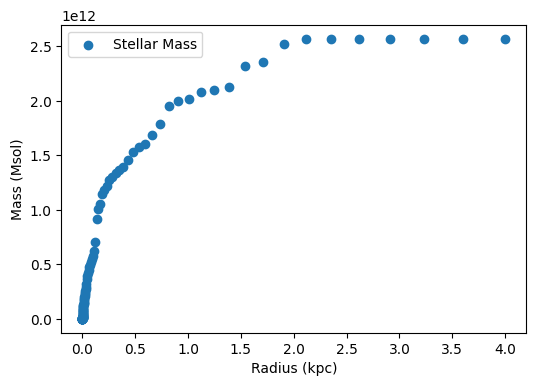

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(data['redges'], data['star_M'], label='Stellar Mass')
plt.xlabel('Radius (kpc)')
plt.ylabel('Mass (Msol)')
plt.legend()
plt.show()

In [10]:
def print_hdf5_structure(name, obj):
    print(f"{name}: {type(obj)}")
    if hasattr(obj, 'shape'):
        print(f"  shape: {obj.shape}")
    if hasattr(obj, 'dtype'):
        print(f"  dtype: {obj.dtype}")
    if hasattr(obj, 'attrs'):
        print(f"  attrs: {dict(obj.attrs)}")

with h5py.File(filename, 'r') as f:
    f.visititems(print_hdf5_structure)

GrNm: <class 'h5py._hl.dataset.Dataset'>
  shape: (250,)
  dtype: int64
  attrs: {'description': 'Group number of the friends-of-friends group. These start at 1.', 'units': 'index'}
L: <class 'h5py._hl.dataset.Dataset'>
  shape: (250, 3)
  dtype: float64
  attrs: {'description': 'Specific angular momentum vector of stars (used to set z-axis)', 'units': 'kpc km s^-1 / h'}
M200: <class 'h5py._hl.dataset.Dataset'>
  shape: (250,)
  dtype: float64
  attrs: {'description': 'Virial mass', 'units': 'Msun'}
Redges: <class 'h5py._hl.dataset.Dataset'>
  shape: (250, 101)
  dtype: float64
  attrs: {'description': 'Radial bin edges for cylindrical profiles (physical, not co-moving)', 'units': 'Mpc'}
Zedges: <class 'h5py._hl.dataset.Dataset'>
  shape: (250, 201)
  dtype: float64
  attrs: {'description': 'Z-axis bin edges for cylindrical profiles (physical, not co-moving)', 'units': 'Mpc'}
baryon_potential_sphere: <class 'h5py._hl.dataset.Dataset'>
  shape: (250, 100, 200)
  dtype: float64
  attrs: 

# Testing simulations.py

In [16]:
d = sim.fit(0)

In [17]:
rho_sph_dict = d.sph_avg_dm_density()
rho_sph_baryon_dict = d.sph_avg_baryon_density()
rho_sph_bh_dict = d.sph_avg_bh_density()

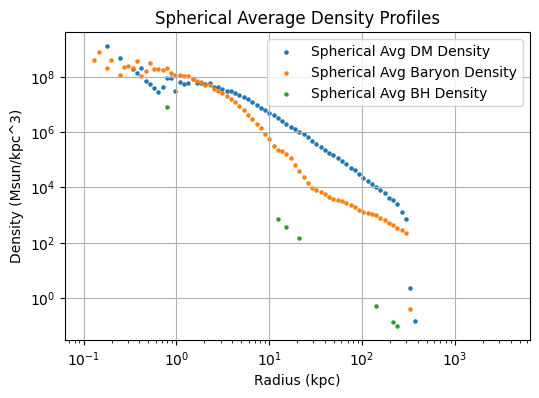

In [18]:
plt.figure(figsize=(6, 4))
plt.scatter(rho_sph_dict['r'], rho_sph_dict['rho'], label='Spherical Avg DM Density', s=5)
plt.scatter(rho_sph_baryon_dict['r'], rho_sph_baryon_dict['rho'], label='Spherical Avg Baryon Density', s=5)
plt.scatter(rho_sph_bh_dict['r'], rho_sph_bh_dict['rho'], label='Spherical Avg BH Density', s=5)
plt.xlabel('Radius (kpc)')
plt.ylabel('Density (Msun/kpc^3)')
plt.title('Spherical Average Density Profiles')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()  

/tmp/ipykernel_32911/1617867815.py:12: RuntimeWarning: invalid value encountered in log10
  log_rho_2D = np.log10(rho_2D)


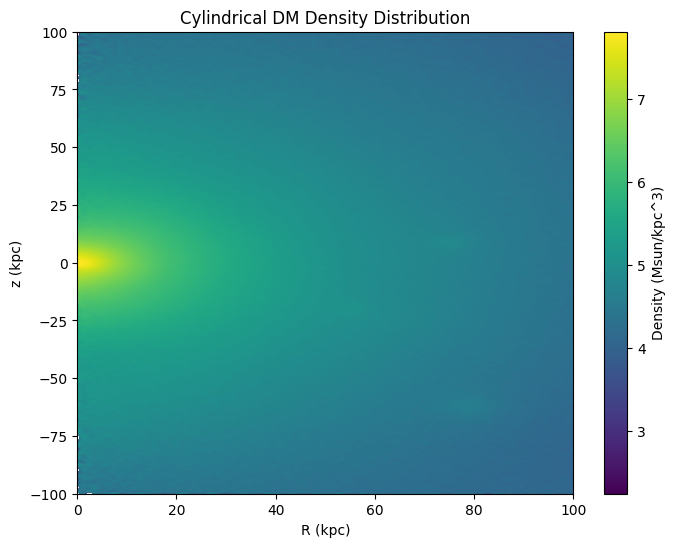

In [19]:
dm_density = d.cyl_dm_density_func()
Redges = d.Redges
Zedges = d.Zedges
Rcent = d.Rcent
Zcent = d.Zcent
extent = [Redges[0], Redges[-1], Zedges[0], Zedges[-1]]

# make grid of values 
Ri = np.linspace(Redges[0], Redges[-1], 500)
Zi = np.linspace(Zedges[0], Zedges[-1], 500)
rho_2D = dm_density(Ri, Zi)
log_rho_2D = np.log10(rho_2D)

plt.figure(figsize=(8, 6))
plt.imshow(log_rho_2D.T, origin='lower', extent=extent, aspect='auto', cmap='viridis')
plt.colorbar(label='Density (Msun/kpc^3)')
plt.xlabel('R (kpc)')
plt.ylabel('z (kpc)')
plt.title('Cylindrical DM Density Distribution')
plt.show()


In [7]:
dm_density(1,2)

array([[7061327.28112411]])